# Actividad 3-3. El algoritmo K - means

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.cluster import KMeans

In [82]:
Df1 = pd.read_csv("Iris.csv")
Df_Iris = Df1[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
Df_Iris


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1. Calculo de la inercia y número optimo de centroides

In [83]:
wcss = []
for index in range(1,11): ## Calcular un rango de clusters desde 1 a 11 para obtener el grafico del codo
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 5)
    kmeans.fit(Df_Iris)
    
    wcss.append(kmeans.inertia_)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

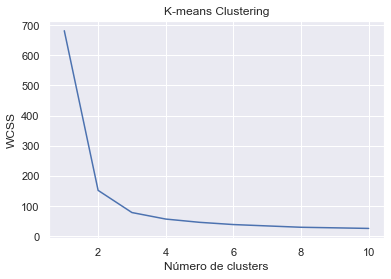

In [84]:
## Codo de Jambu

sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS") 

In [85]:
## Criterio de silhouette

from sklearn import datasets
from sklearn.metrics import silhouette_score

In [86]:
silh = Df_Iris.to_numpy()
for j in range (2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 33)
    kmeans.fit_predict(silh)
    # Calculamos el score de silueta
    score = silhouette_score(silh, kmeans.labels_, metric = "euclidean")
    print("Score silhouette;", "k = ", j, ":", score)

Score silhouette; k =  2 : 0.6810461692117467
Score silhouette; k =  3 : 0.5528190123564102
Score silhouette; k =  4 : 0.49805050499728815
Score silhouette; k =  5 : 0.48874888709310654
Score silhouette; k =  6 : 0.3648340039670038
Score silhouette; k =  7 : 0.35882944509656967
Score silhouette; k =  8 : 0.35256917692984185
Score silhouette; k =  9 : 0.3397602108005176
Score silhouette; k =  10 : 0.3171863896420711
Score silhouette; k =  11 : 0.3139121933820406


#### Observaciones
Para el cálculo óptimo de centroides se determinó por medio del codo de Jambu que 2 centroides son los más adecuados, los cuales fueron contrastados posteriormente por el criterio de silueta

### 2. Cálculo de las agrupaciones K means


In [87]:
# Muestra de los datos agrupados

kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 22)
cluster_values = kmeans.fit_predict(Df_Iris)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


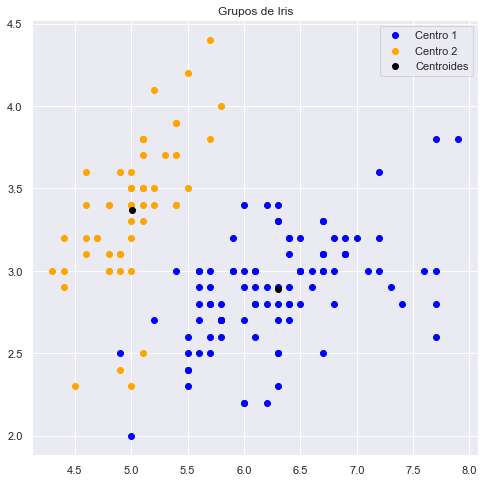

In [88]:
# Conversión a arreglo
Df_Iris_np = Df_Iris.to_numpy()

# Graficación de los datos agrupados

mp.figure(figsize = (8,8))
mp.scatter(Df_Iris_np[cluster_values == 0, 0], Df_Iris_np[cluster_values==0, 1], c = "Blue", label = "Centro 1")
mp.scatter(Df_Iris_np[cluster_values == 1, 0], Df_Iris_np[cluster_values==1, 1], c = "orange", label = "Centro 2")


## Centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", label = "Centroides")
mp.title("Grupos de Iris")
mp.legend()

### 3. Cálculo de los agrupamientos con PCA (2 componentes)

In [89]:
Df2 = pd.read_csv("Iris.csv")
Df_Iris2 = Df2.drop(["variety"], axis =1)
Df_Iris2

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [90]:
## Reducción a dos componentes

from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(Df_Iris2)
Iris_2com = pca.transform(Df_Iris2)
Iris_2com

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 4. Calculo de la inercia y número optimo de centroides (2 componentes)

In [99]:
wcss2 = []
for index in range(1,11): ## Calcular un rango de clusters desde 1 a 11 para obtener el grafico del codo
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(Iris_2com)
    
    wcss2.append(kmeans.inertia_)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

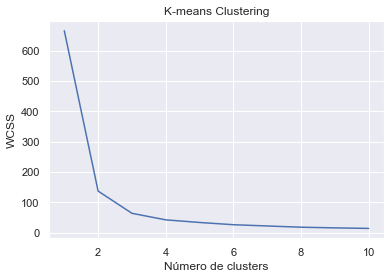

In [100]:
## Codo de Jambu

sb.set()
mp.plot(range(1,11), wcss2)
mp.title("K-means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS") 

In [93]:
## Cálculo del número de centroides optimos por criterio de silueta
for j in range (2, 12):
    kmeans = KMeans(n_clusters = j, random_state = 33)
    kmeans.fit_predict(Iris_2com)
    # Calculamos el score de silueta
    score = silhouette_score(silh, kmeans.labels_, metric = "euclidean")
    print("Score silhouette;", "k = ", j, ":", score)

Score silhouette; k =  2 : 0.6810461692117467
Score silhouette; k =  3 : 0.5511916046195927
Score silhouette; k =  4 : 0.49651686549149454
Score silhouette; k =  5 : 0.48841498417573687
Score silhouette; k =  6 : 0.3645001010496341
Score silhouette; k =  7 : 0.34639579592948483
Score silhouette; k =  8 : 0.3571854600211395
Score silhouette; k =  9 : 0.33355970715297817
Score silhouette; k =  10 : 0.30311105476161493
Score silhouette; k =  11 : 0.2781462233023465


In [94]:
# Muestra de los datos agrupados

kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state = 22)
cluster_values = kmeans.fit_predict(Iris_2com)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


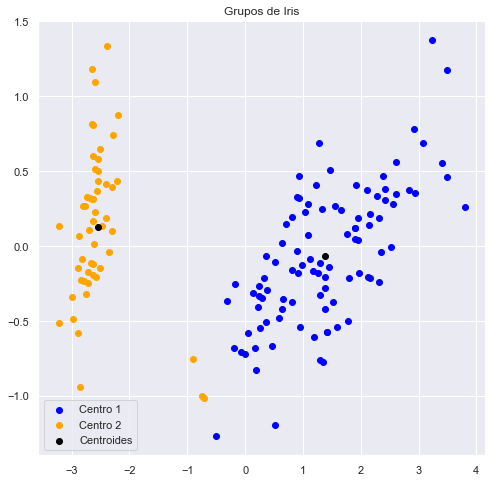

In [95]:
# Graficación de los datos agrupados

mp.figure(figsize = (8,8))
mp.scatter(Iris_2com[cluster_values == 0, 0], Iris_2com[cluster_values==0, 1], c = "Blue", label = "Centro 1")
mp.scatter(Iris_2com[cluster_values == 1, 0], Iris_2com[cluster_values==1, 1], c = "orange", label = "Centro 2")


## Centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = "black", label = "Centroides")
mp.title("Grupos de Iris")
mp.legend()

### 5. Observaciones
Al hacer la reducción de componentes a 2, no se notaron diferencias en el número de centros optimos, siendo 2 los centros encontrados, sin embargo, al hacer la graficación se puede apreciar una mejor separación de los valores de cada nucleo, siendo la reducción de componentes mejor para definir con mayor claridad que valores pertenecen a cada grupo.

La reducción de componentes principales tiene como objetivo dar una visión diferente de como se agrupan los datos, utilizando la información más relevante y reduciendo lo demás, lo que permite tener nuevas visualizaciones a los datos que, como en el ejercicio anterior, revelan cambios en las agrupaciones que pueden ayudar a mejorar el procesado y manejo de datos.